In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   studytime  attendance  assignment grade
0         50          20          10     A
1         45          18          10     A
2         43          18           9     A
3         41          17           8     A
4         44          17           8     A
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.

1/1 [==============================] - 0s 66ms/step
Predict:
 [[8.6918747e-01 1.3003185e-01 7.8077172e-04]
 [1.4178513e-01 6.5995824e-01 1.9825660e-01]
 [9.0463944e-03 2.8081506e-01 7.1013856e-01]]
119/119 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8992
Evaluate:
 [0.36913084983825684, 0.8991596698760986]


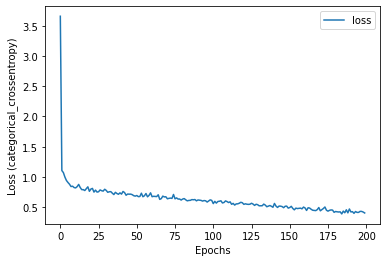

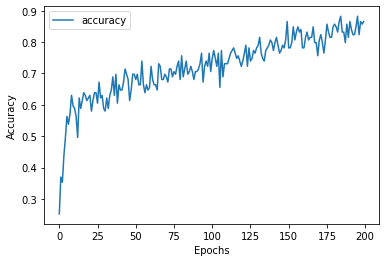

Model summary:

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                64        
                                                                 
 dense_12 (Dense)            (None, 3)                 51        
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/kmong/grade_softmax/data.csv')
print (df.head())

# X,Y 데이터로 나누기
X = df.values[0:, 0:3].astype(float)
Y = df.values[0:, 3]


# A,B,C 를 0,1,2,로 바꾼후 One Hot Encoding
encoder = LabelEncoder()
encoder.fit(Y)
Y_encoded = to_categorical(encoder.transform(Y))
print (Y_encoded)

# 입력 feature 갯수가 3개인 모델 구현 아웃풋 갯수도 3
# 첫번째 layer의 activation function은 relu, 두번째 layer의 activation function은 softmax

model=Sequential()
model.add(Dense(16, input_dim=3, activation='relu'))
model.add(Dense(3, input_dim=3, activation='softmax'))

  
# loss function은 categorical_crossentropy, optimizer는 adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습 (학습 반복은 200회, 배치사이즈는 1)
history = model.fit(X, Y_encoded, epochs=200, batch_size=1, shuffle=True)

# 임의의 3학생의 데이터값으로 성적 예측
predict = model.predict([[46, 18, 8],[34,16,7],[28,14,5]])
print ('Predict:\n',  predict)
    
# test loss,accuracy 출력
loss_and_metric = model.evaluate(X, Y_encoded, batch_size=1)
print ('Evaluate:\n', loss_and_metric)

# Loss 와 accuracy 시각화 
plt.plot(history.history['loss'])
plt.ylabel('Loss (categorical_crossentropy)')
plt.legend(['loss'])
plt.xlabel('Epochs')
plt.show()

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.legend(['accuracy'])
plt.xlabel('Epochs')
plt.show()


# print model summary
print ('Model summary:\n')
model.summary()
